<a href="https://www.kaggle.com/code/youssefashraf7/factor-analysis?scriptVersionId=156847372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Obtaining dependency information for pre-commit from https://files.pythonhosted.org/packages/e2/e3/54cd906d377e1766299df14710ded125e195d5c685c8f1bafecec073e9c6/pre_commit-3.6.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for cfgv>=2.0.0 from https://files.pythonhosted.org/packages/c5/55/51844dd50c4fc7a33b653bfaba4c2456f06955289ca770a5dbd5fd267374/cfgv-3.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for identify>=1.0.0 from https://files.pythonhosted.org/packages/a8/a3/9578c3b5dd725f65d277923dc5cc8fd881d87f68067f8267670b346a5593/identify-2.5.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for nodeenv>=0.11.1 from https://files.pythonhosted.org/packages/1a/e6/6d2ead760a9ddb35e65740fd5

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data

data = pd.read_csv("/kaggle/input/data-set-factor-analysis/FactorAnalysis.csv")

In [4]:
#explor the data

data.head()

,Academic record,Appearance,Communication,Company Fit,Experience,Job Fit,Letter,Likeability,Organization,Potential,Resume,Self-Confidence
0,6.0,8.0,7.0,5.0,6.0,5.0,7.0,7.0,7.0,6.0,7.0,7.0
1,9.0,8.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0
2,6.0,7.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,6.0,6.0,8.0
3,7.0,8.0,6.0,5.0,8.0,5.0,9.0,8.0,7.0,8.0,7.0,7.0
4,4.0,7.0,8.0,6.0,6.0,6.0,6.0,7.0,8.0,5.0,4.0,6.0


In [5]:
data.columns

Index(['Academic record', 'Appearance', 'Communication', 'Company Fit',
       'Experience', 'Job Fit', 'Letter', 'Likeability', 'Organization',
       'Potential', 'Resume', 'Self-Confidence'],
      dtype='object')

In [6]:
data.isnull().sum()

Academic record    2
Appearance         2
Communication      1
Company Fit        2
Experience         3
Job Fit            1
Letter             1
Likeability        1
Organization       1
Potential          1
Resume             1
Self-Confidence    1
dtype: int64

In [7]:
# clean the data 

data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 56
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Academic record  53 non-null     float64
 1   Appearance       53 non-null     float64
 2   Communication    53 non-null     float64
 3   Company Fit      53 non-null     float64
 4   Experience       53 non-null     float64
 5   Job Fit          53 non-null     float64
 6   Letter           53 non-null     float64
 7   Likeability      53 non-null     float64
 8   Organization     53 non-null     float64
 9   Potential        53 non-null     float64
 10  Resume           53 non-null     float64
 11  Self-Confidence  53 non-null     float64
dtypes: float64(12)
memory usage: 5.4 KB


## Factor Analysis
Factor analysis is a linear statistical model, that is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms. Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.

### Test to check for adequacy
The following tests are used to check the adequacy to apply factor analysis to the dataset.

1. BARTLETT’S TEST OF SPHERICITY

2. KAISER-MEYER-OLKIN (KMO) TEST

In [9]:
# BARTLETT’S TEST OF SPHERICITY
chi_square_value , p_value = calculate_bartlett_sphericity(data)

In [10]:
chi_square_value , p_value

(502.32231726697535, 2.2872039996370068e-68)

#### The p-value < 0.05, correlation is present among the variables with 95% confidence interval



### KMO Test
KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated.

In [11]:
#KAISER-MEYER-OLKIN (KMO) TEST
kmo_all , kmo_model = calculate_kmo(data)

In [12]:
kmo_model

0.7916167866885949

#### KMO score is close to 1, thus applying factor analysis can be effective for the dataset.
#### --------------------------------------------------------------------------------------------------

### Both Bartlett's Test and KMO indicates that the dataframe is good to go for factor analysis.
### Because p-value < 0.05 and KMO score > 0.6



### let's start the factor analysis with 10 factors

In [13]:
# instantiate the Factor Analyzer
num_factors = 10
factor_analyzer = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the model to the data
factor_analyzer.fit(data)

# Identify the eigenvalues
ev , v = factor_analyzer.get_eigenvalues()
ev

array([6.33167078, 1.58101683, 1.06528884, 1.02254851, 0.63196734,
       0.37713857, 0.31834615, 0.2284697 , 0.15129887, 0.13330331,
       0.08944287, 0.06950823])

### The above array of eigen values show that we can create four factors.
### Because only four factors that eigenvalues > 1

#### (Note) "Eigenvalues greater than 1 are commonly used as a rule of thumb for factor retention, as they indicate that the retained factor explains more variance than a single observed variable".


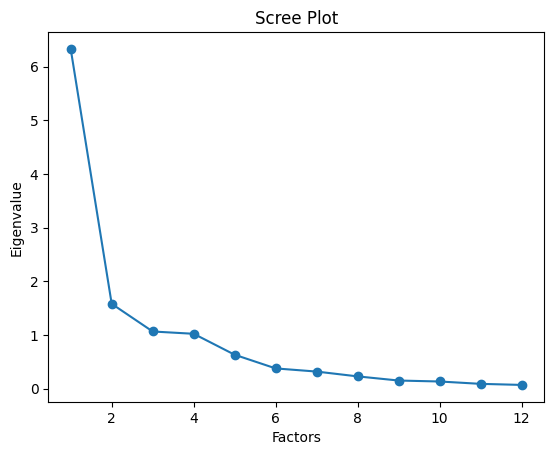

In [14]:
# Plot the scree plot to help determine the number of factors
ev, v = factor_analyzer.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

## This plot clearly demonstrates that selecting four factors is the correct decision.

### let's repeat the factor analysis but with 4 factors this time.

In [15]:
# Then, we repeat the factor analyzer using four factors, fitting it, and print the factor loadings for each variables.
num_factors_2 = 4
factor_analyzer_2 = FactorAnalyzer(n_factors=num_factors_2, rotation='varimax')

# Fit the model to your data
factor_analyzer_2.fit(data)



FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

### Factor Loading
Factor loading can tell us how each factor created is explaining each of the variable. More value says that factor explains well about that variable. Sorting the factor load values helps us understand which variables are grouped to represent a new factor.

In [16]:
fa_load = pd.DataFrame(factor_analyzer_2.loadings_, index=data.columns , columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
fa_load

,Factor 1,Factor 2,Factor 3,Factor 4
Academic record,0.697091,0.113287,0.285359,0.195484
Appearance,0.231149,0.283835,0.703960,0.175834
Communication,0.114418,0.782609,0.275791,0.193451
Company Fit,0.574108,0.589950,0.151619,0.202764
Experience,0.697718,-0.049337,0.198150,0.336095
Job Fit,0.659199,0.489924,0.166115,0.201839
Letter,0.245758,0.233640,0.068684,0.892383
Likeability,0.236022,0.332887,0.680341,0.182667
Organization,0.090223,0.877344,0.316759,0.040882
Potential,0.858321,0.206136,0.297841,0.128239


In [17]:
print(pd.DataFrame(factor_analyzer_2.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          2.857425  2.319334  2.142158  1.813391
Proportional Var  0.238119  0.193278  0.178513  0.151116
Cumulative Var    0.238119  0.431397  0.609910  0.761026


#### The new 4 factors created can explain 76% variance in the data.



### Let's sort the dataframe based on each factor using cut off value 0.3.



In [18]:
# sort by factor 1
fa_load.sort_values('Factor 1', ascending=False)


,Factor 1,Factor 2,Factor 3,Factor 4
Potential,0.858321,0.206136,0.297841,0.128239
Experience,0.697718,-0.049337,0.198150,0.336095
Academic record,0.697091,0.113287,0.285359,0.195484
Job Fit,0.659199,0.489924,0.166115,0.201839
Company Fit,0.574108,0.589950,0.151619,0.202764
Resume,0.316615,0.086715,0.337041,0.808709
Self-Confidence,0.304649,0.194457,0.793120,0.100916
Letter,0.245758,0.233640,0.068684,0.892383
Likeability,0.236022,0.332887,0.680341,0.182667
Appearance,0.231149,0.283835,0.703960,0.175834


In [19]:
# sort by factor 2
fa_load.sort_values('Factor 2', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
Organization,0.090223,0.877344,0.316759,0.040882
Communication,0.114418,0.782609,0.275791,0.193451
Company Fit,0.574108,0.589950,0.151619,0.202764
Job Fit,0.659199,0.489924,0.166115,0.201839
Likeability,0.236022,0.332887,0.680341,0.182667
Appearance,0.231149,0.283835,0.703960,0.175834
Letter,0.245758,0.233640,0.068684,0.892383
Potential,0.858321,0.206136,0.297841,0.128239
Self-Confidence,0.304649,0.194457,0.793120,0.100916
Academic record,0.697091,0.113287,0.285359,0.195484


In [20]:
# sort by factor 3
fa_load.sort_values('Factor 3', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
Self-Confidence,0.304649,0.194457,0.793120,0.100916
Appearance,0.231149,0.283835,0.703960,0.175834
Likeability,0.236022,0.332887,0.680341,0.182667
Resume,0.316615,0.086715,0.337041,0.808709
Organization,0.090223,0.877344,0.316759,0.040882
Potential,0.858321,0.206136,0.297841,0.128239
Academic record,0.697091,0.113287,0.285359,0.195484
Communication,0.114418,0.782609,0.275791,0.193451
Experience,0.697718,-0.049337,0.198150,0.336095
Job Fit,0.659199,0.489924,0.166115,0.201839


In [21]:
# sort by factor 4
fa_load.sort_values('Factor 4', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
Letter,0.245758,0.233640,0.068684,0.892383
Resume,0.316615,0.086715,0.337041,0.808709
Experience,0.697718,-0.049337,0.198150,0.336095
Company Fit,0.574108,0.589950,0.151619,0.202764
Job Fit,0.659199,0.489924,0.166115,0.201839
Academic record,0.697091,0.113287,0.285359,0.195484
Communication,0.114418,0.782609,0.275791,0.193451
Likeability,0.236022,0.332887,0.680341,0.182667
Appearance,0.231149,0.283835,0.703960,0.175834
Potential,0.858321,0.206136,0.297841,0.128239


## Let's create a heatmap to easily extract output for each factor.

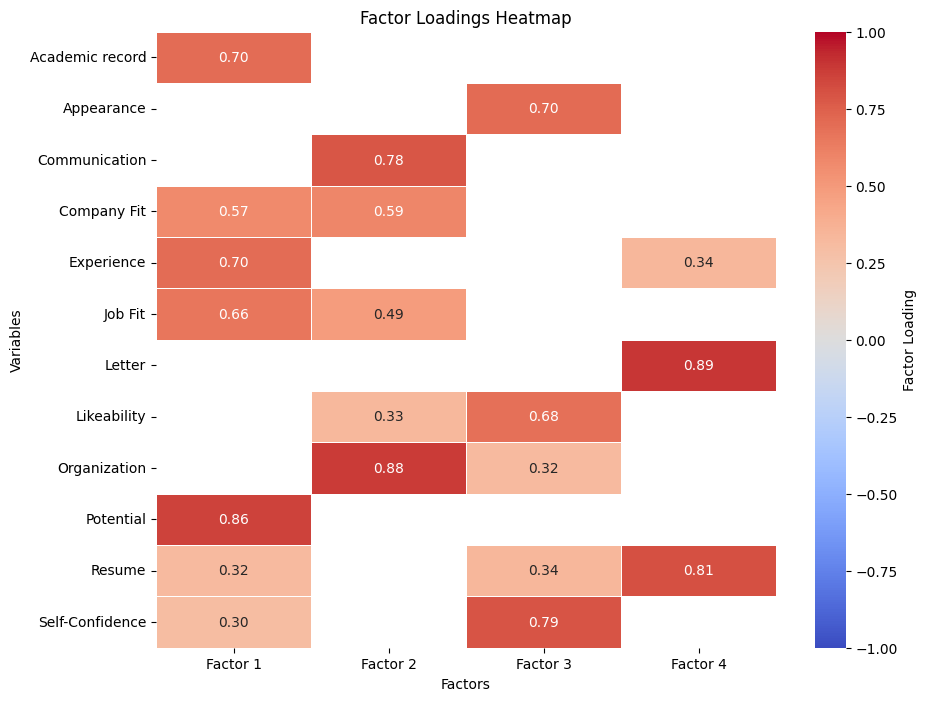

In [22]:
# Set up a threshold for highlighting strong factor loadings
threshold = 0.3

# Heatmap with annotations, factor names, and color map
plt.figure(figsize=(10, 8))
sns.heatmap(fa_load, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"label": "Factor Loading"},
            vmin=-1, vmax=1, mask=(np.abs(fa_load) < threshold))
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()


### * Factor 1: Potential ,Experience ,Academic record ,Job Fit ,Company Fit ,Resume ,Self-Confidence	
### * Factor 2: Organization ,Communication ,Company Fit ,Job Fit	,Likeability 
### * Factor 3: Self-Confidence ,Appearance ,Likeability ,Resume ,Organization
### * Factor 4: Letter ,Resume ,Experience 